In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Column Description
#### unique_id==>Unique identifier for each respondent

#### h1n1_worry==> Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried
#### h1n1_awareness==>Signifies the amount of knowledge or understandingthe respondent has about h1n1 flu - (0,1,2) - 0=No knowledge, 1=little knowledge, 2=good knowledge

#### antiviral_medication==>Has the respondent taken antiviral vaccination - (0,1)

#### contact_avoidance==>Has avoided any close contact with people who have flu-like symptoms - (0,1)

#### bought_face_mask==>Has the respondent bought mask or not - (0,1)

#### wash_hands_frequently==>Washes hands frequently or uses hand sanitizer -(0,1)

#### avoid_large_gatherings==>Has the respondent reduced time spent at large gatherings - (0,1)

#### reduced_outside_home_cont==> Has the respondent reduced contact with people outside their own house - (0,1)

#### avoid_touch_face==> Avoids touching nose, eyes, mouth - (0,1)

#### dr_recc_h1n1_vacc==>Doctor has recommended h1n1 vaccine - (0,1)

#### dr_recc_seasonal_vacc==>The doctor has recommended seasonalflu vaccine -(0,1)

#### chronic_medic_condition==>Has any chronic medical condition - (0,1)
#### cont_child_undr_6_mnth==>Has regular contact with child the age of 6 months -(0,1)

#### is_health_worker==>Is respondent a health worker - (0,1)

#### has_health_insur==>Does respondent have health insurance - (0,1)

#### is_h1n1_vacc_effective==>Does respondent think that the h1n1 vaccine is effective - (1,2,3,4,5)- (1=Thinks not effective at all,2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective,5=Thinks it is highly effective)

#### is_h1n1_risky==>What respondents think about the risk of getting ill with h1n1 in the absence of the vaccine- (1,2,3,4,5)-(1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not,4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky)

#### sick_from_h1n1_vacc==>Does respondent worry about getting sick by taking the h1n1 vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried,3=Doesn't know, 4=Respondent is somewhat worried,5Respondent is very worried) -

#### is_seas_vacc_effective==>Does respondent think that the seasonal vaccine is effective- (1,2,3,4,5)- (1=Thinks not effective at all,2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 4=Thinks it is somewhat effective,5=Thinks it is highly effective)


#### is_seas_flu_risky==>What respondenst think about the risk of getting ill with seasonal flu in the absence of the vaccine-(1,2,3,4,5)- (1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=Doesn't know if it is risky or not, 4=Thinks it is somewhat high risk, 5=Thinks it is very highly risky)

#### sick_from_seas_vacc==> Does respondent worry about getting sick by taking the seasonal flu vaccine - (1,2,3,4,5)- (1=Respondent not worried at all, 2=Respondent is not very worried,3=Doesn't know, 4=Respondent is somewhat worried,5Respondent is very worried)

#### age_bracket==>Age bracket of the respondent - (18 - 34 Years, 35 - 44 Years, 45 - 54 Years, 55 - 64 Years, 64+ Years)

#### qualification Qualification/education level of the respondent as per their response -(<12 Years, 12 Years, College Graduate, Some College)

#### race==> Respondent's race - (White, Black, Other or Multiple,Hispanic)

#### sex==>Respondent's sex - (Female, Male)

#### income_level==>Annual income of the respondent as per the 2008 poverty Census - (<=75000−AbovePoverty,>75000−AbovePoverty,>75000, Below Poverty)

#### marital_status==>Respondent's marital status - (Not Married, Married)

#### housing_status==>Respondent's housing status - (Own, Rent)

#### employment==>Respondent's employment status - (Not in Labor Force, Employed, Unemployed)

#### census_msa==>Residence of the respondent with the MSA(metropolitan statistical area)(Non-MSA, MSANot Principle, CityMSA-Principle city) - (Yes, no)

#### no_of_adults==>Number of adults in the respondent's house (0,1,2,3) -(Yes, no)

#### no_of_children==> Number of children in the respondent's house(0,1,2,3)- (Yes, No)

#### h1n1_vaccine Dependent variable)Did the respondent received the h1n1 vaccine or not(1,0) - (Yes, No)

In [66]:
df=pd.read_csv("/kaggle/input/h1n1-flu-vaccine/h1n1_vaccine_prediction.csv")

In [67]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [68]:
df.shape

(26707, 34)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [70]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [73]:
df.shape

(11794, 34)

In [74]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,...,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000,11794.000000
mean,13374.787858,1.530609,1.272596,0.053841,0.731474,0.068509,0.821859,0.331694,0.312193,0.679159,...,0.882398,3.961336,2.313210,2.293285,4.060709,2.749534,2.093692,0.910717,0.525776,0.301933
std,7722.063505,0.883892,0.604304,0.225713,0.443212,0.252629,0.382648,0.470842,0.463408,0.466820,...,0.322150,0.989145,1.286389,1.343129,1.073905,1.390209,1.321969,0.769059,0.919219,0.459116
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6712.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13334.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20077.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [75]:
df.drop(columns="unique_id",axis=1,inplace=True)

In [76]:
df['age_bracket'] = df['age_bracket'].str.split().str[0]

In [77]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
7,45,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA
9,55,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City"
10,45,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26697,65+,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City"
26699,45,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
26701,18,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City"
26703,18,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"


In [78]:
object_columns["qualification"].unique()

array(['< 12 Years', '12 Years', 'Some College', 'College Graduate'],
      dtype=object)

In [79]:
object_columns["income_level"].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [80]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,1


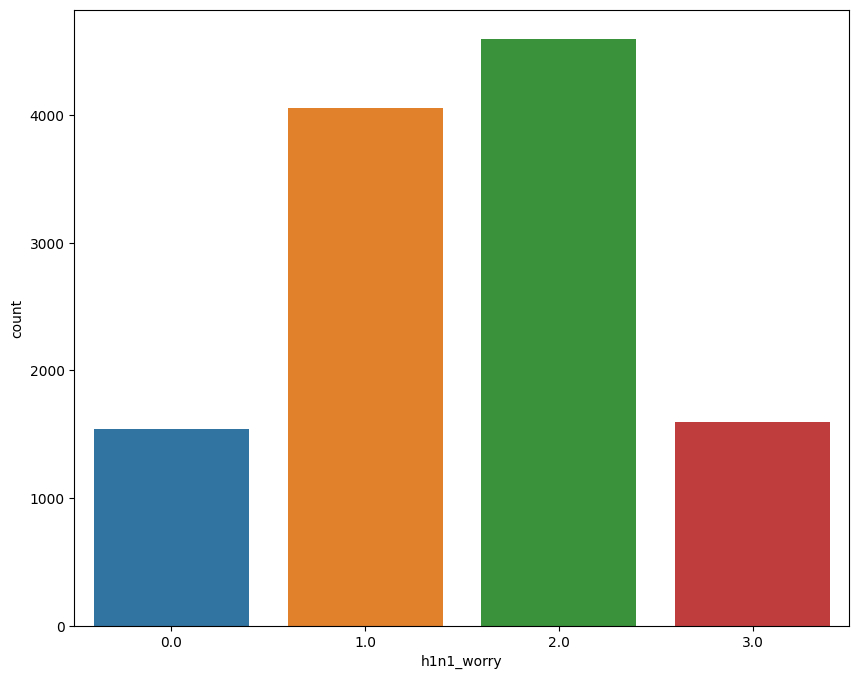

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(x="h1n1_worry",data=df)
plt.show()

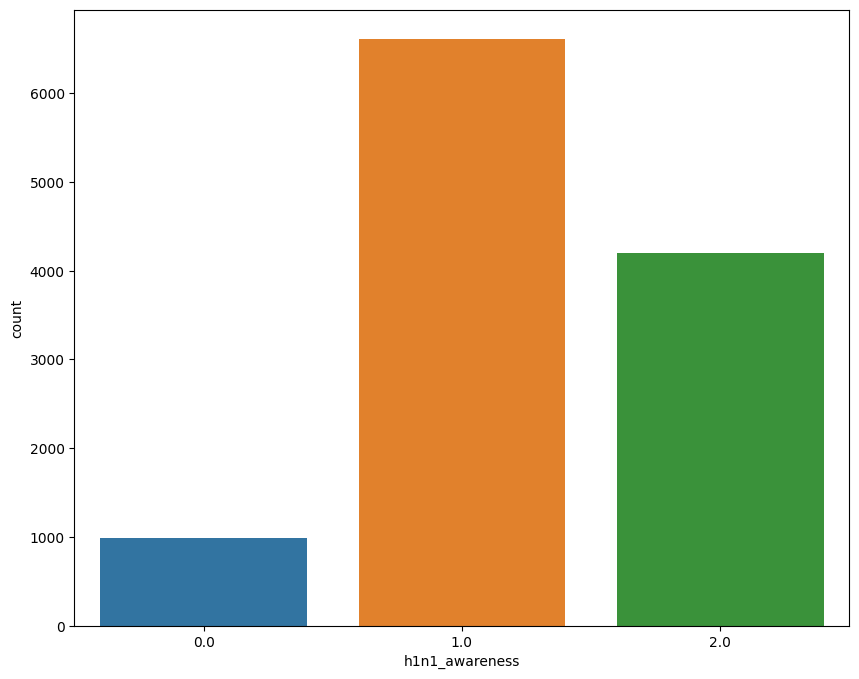

In [82]:
plt.figure(figsize=(10,8))
sns.countplot(x="h1n1_awareness",data=df)
plt.show()

In [83]:
df["antiviral_medication"].value_counts()

antiviral_medication
0.0    11159
1.0      635
Name: count, dtype: int64

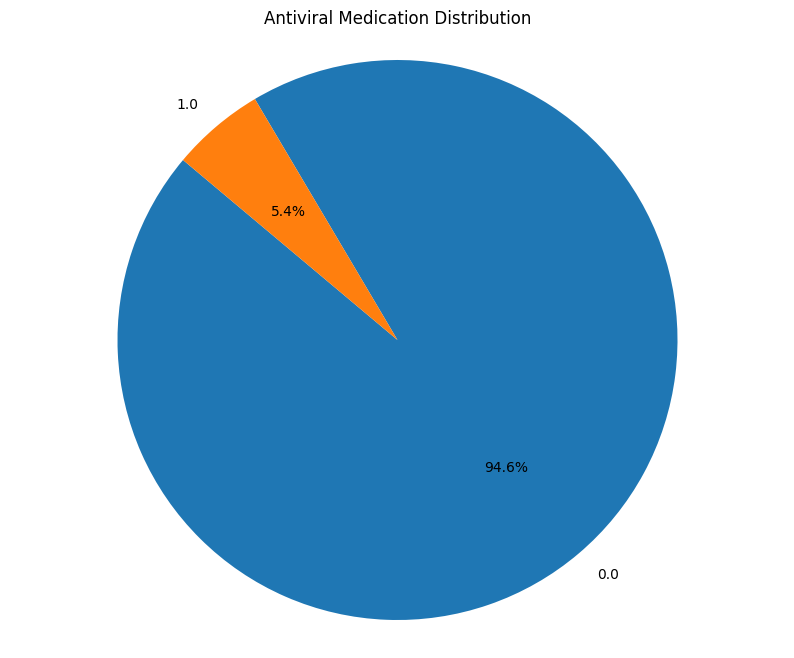

In [84]:

value_counts = df["antiviral_medication"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Antiviral Medication Distribution')
plt.axis('equal')
plt.show()

In [85]:
df["contact_avoidance"].value_counts()

contact_avoidance
1.0    8627
0.0    3167
Name: count, dtype: int64

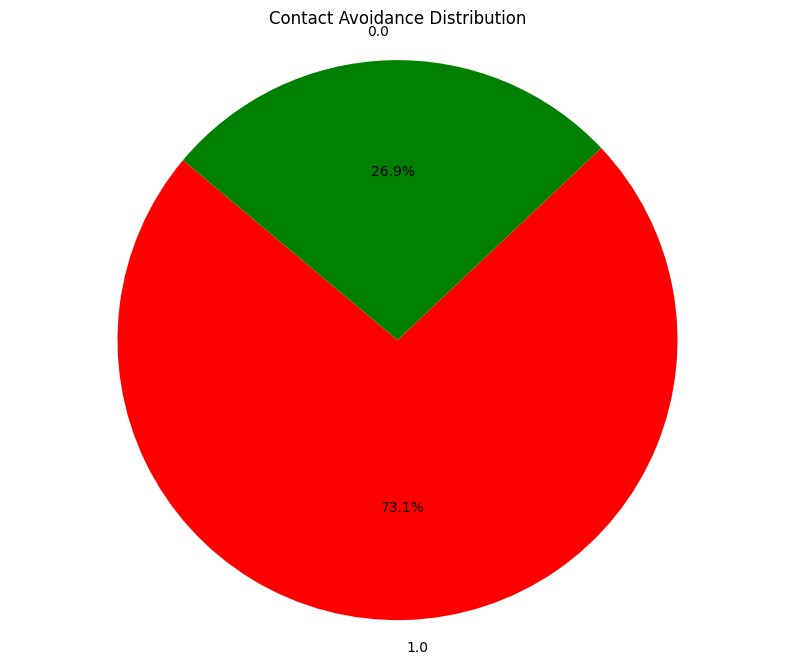

In [86]:
contact_avoidance_counts = df["contact_avoidance"].value_counts()

plt.figure(figsize=(10,8))
color=["red","green"]
plt.pie(contact_avoidance_counts, labels=contact_avoidance_counts.index, autopct='%1.1f%%', startangle=140,colors=color)
plt.title('Contact Avoidance Distribution')
plt.axis('equal')
plt.show()

In [87]:
df["bought_face_mask"].value_counts()

bought_face_mask
0.0    10986
1.0      808
Name: count, dtype: int64

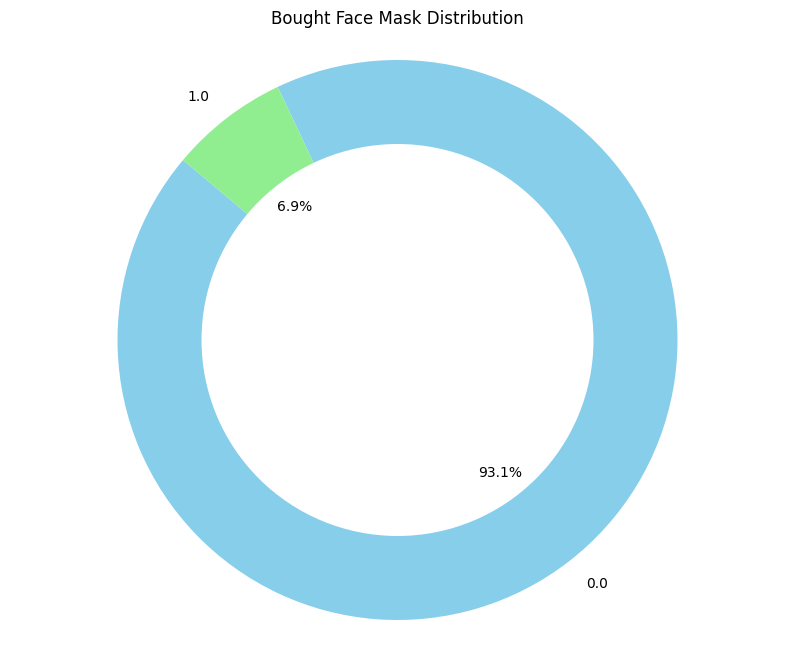

In [88]:
bought_face_mask_counts = df["bought_face_mask"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(bought_face_mask_counts, labels=bought_face_mask_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Bought Face Mask Distribution')
plt.axis('equal')
plt.show()

In [89]:
df["wash_hands_frequently"].value_counts()

wash_hands_frequently
1.0    9693
0.0    2101
Name: count, dtype: int64

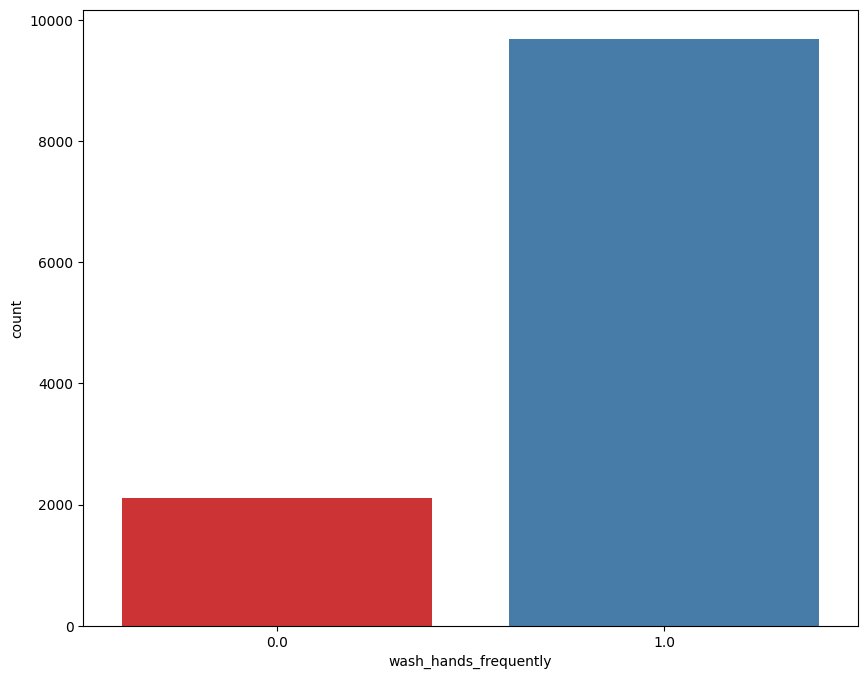

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(x="wash_hands_frequently",data=df,palette="Set1")
plt.show()

In [91]:
df["avoid_large_gatherings"].value_counts()

avoid_large_gatherings
0.0    7882
1.0    3912
Name: count, dtype: int64

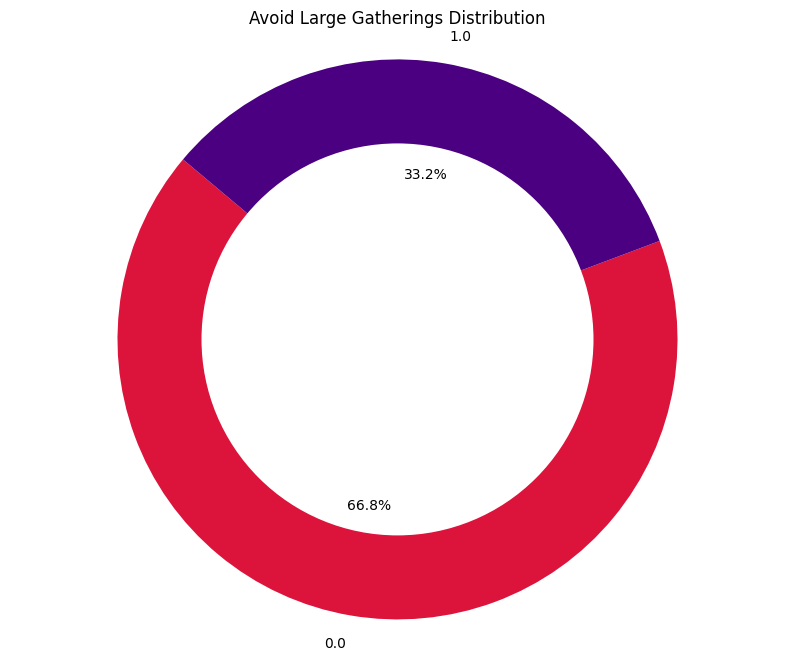

In [92]:
avoid_large_gatherings_counts = df["avoid_large_gatherings"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(avoid_large_gatherings_counts, labels=avoid_large_gatherings_counts.index, autopct='%1.1f%%', startangle=140, colors=['crimson', 'indigo'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Avoid Large Gatherings Distribution')
plt.axis('equal')
plt.show()

In [93]:
df["reduced_outside_home_cont"].value_counts()

reduced_outside_home_cont
0.0    8112
1.0    3682
Name: count, dtype: int64

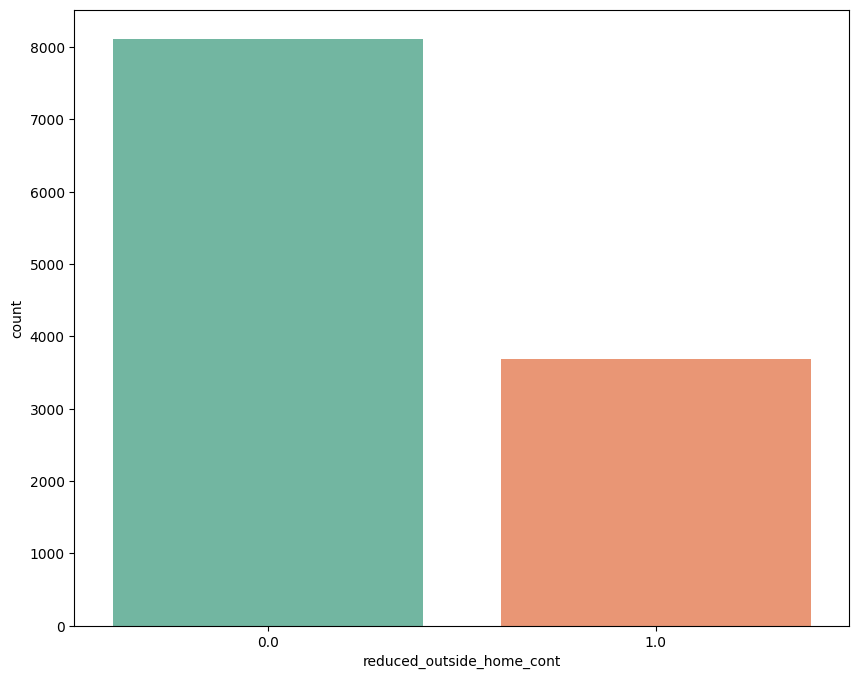

In [94]:
plt.figure(figsize=(10,8))
sns.countplot(x="reduced_outside_home_cont",data=df,palette="Set2")
plt.show()

In [95]:
df["avoid_touch_face"].value_counts()

avoid_touch_face
1.0    8010
0.0    3784
Name: count, dtype: int64

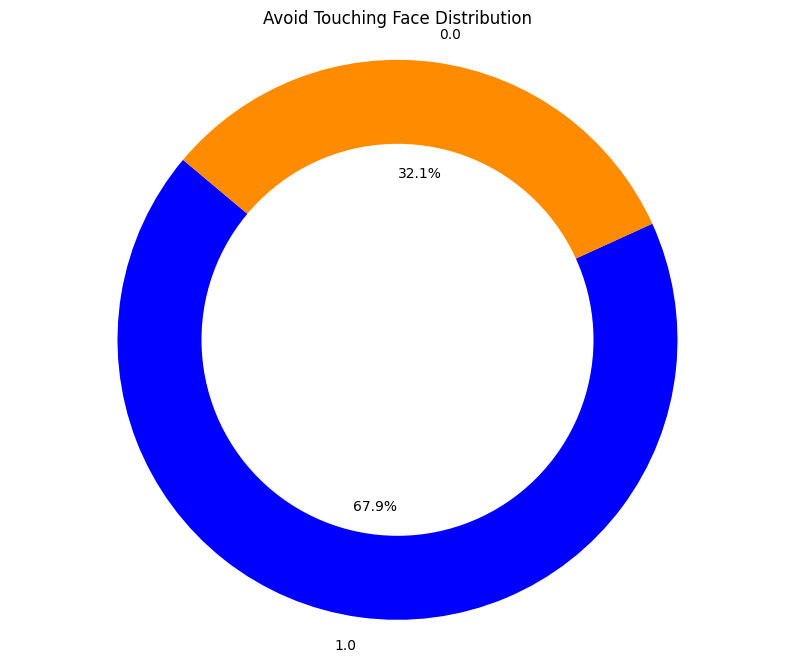

In [96]:
avoid_touch_face_counts = df["avoid_touch_face"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(avoid_touch_face_counts, labels=avoid_touch_face_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'darkorange'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Avoid Touching Face Distribution')
plt.axis('equal')
plt.show()

In [97]:
object_columns = df.select_dtypes(include=['object'])
object_columns

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
7,45,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA
9,55,12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City"
10,45,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26697,65+,College Graduate,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City"
26699,45,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
26701,18,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City"
26703,18,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"


In [98]:
df["age_bracket"] = df["age_bracket"].str.replace("+", "")

In [99]:
df["age_bracket"].value_counts()

age_bracket
65    2757
55    2563
45    2400
18    2370
35    1704
Name: count, dtype: int64

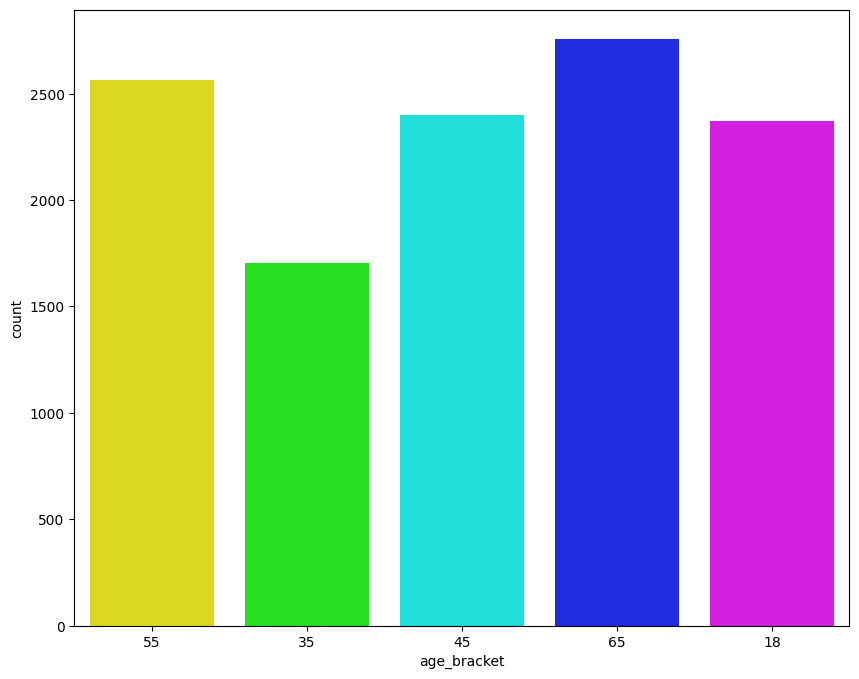

In [100]:
plt.figure(figsize=(10,8))
sns.countplot(x="age_bracket",data=df,palette="hsv")
plt.show()

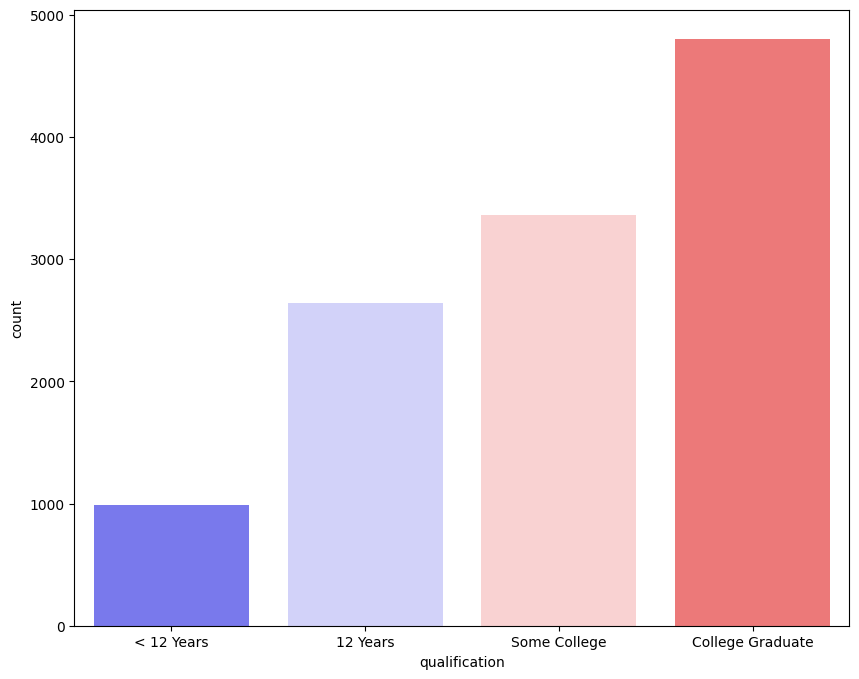

In [101]:
plt.figure(figsize=(10,8))
sns.countplot(x="qualification",data=df,palette="bwr")
plt.show()

In [102]:
df["race"].value_counts()

race
White                9457
Black                 910
Hispanic              742
Other or Multiple     685
Name: count, dtype: int64

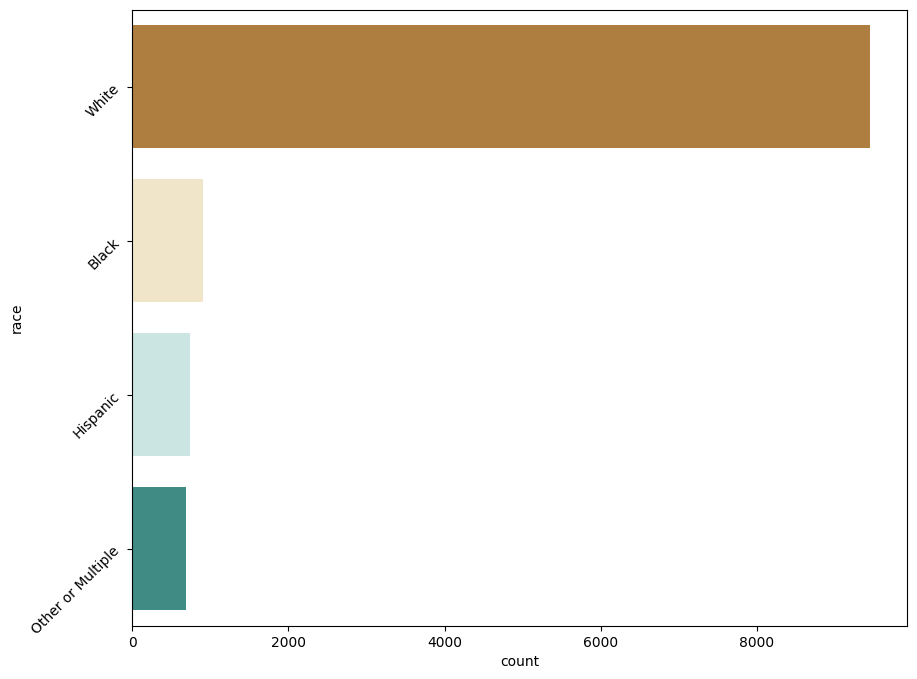

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(y="race",data=df,palette="BrBG")
plt.yticks(rotation=45)
plt.show()

In [104]:
df["sex"].value_counts()

sex
Female    6997
Male      4797
Name: count, dtype: int64

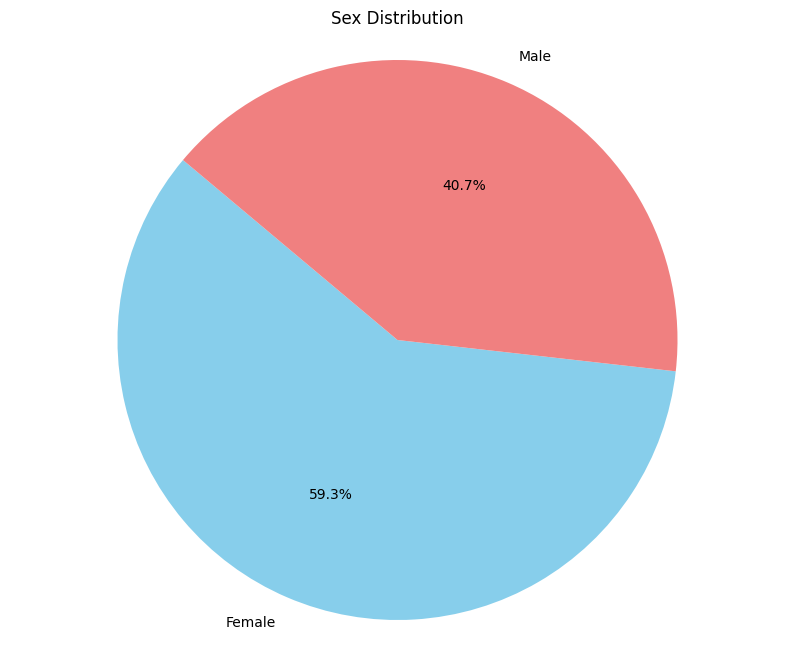

In [105]:
sex_counts = df["sex"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Sex Distribution')
plt.axis('equal')
plt.show()

In [106]:
df["income_level"].value_counts()

income_level
<= $75,000, Above Poverty    6750
> $75,000                    3629
Below Poverty                1415
Name: count, dtype: int64

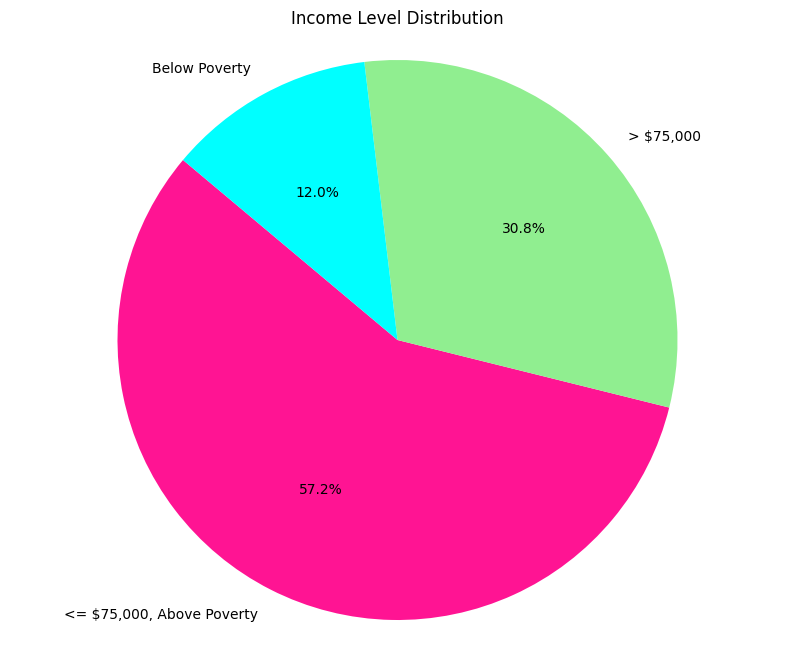

In [107]:
income_level_counts = df["income_level"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(income_level_counts, labels=income_level_counts.index, autopct='%1.1f%%', startangle=140, colors=['deeppink', 'lightgreen', 'cyan'])
plt.title('Income Level Distribution')
plt.axis('equal')
plt.show()

In [108]:
df["marital_status"].value_counts()

marital_status
Married        6340
Not Married    5454
Name: count, dtype: int64

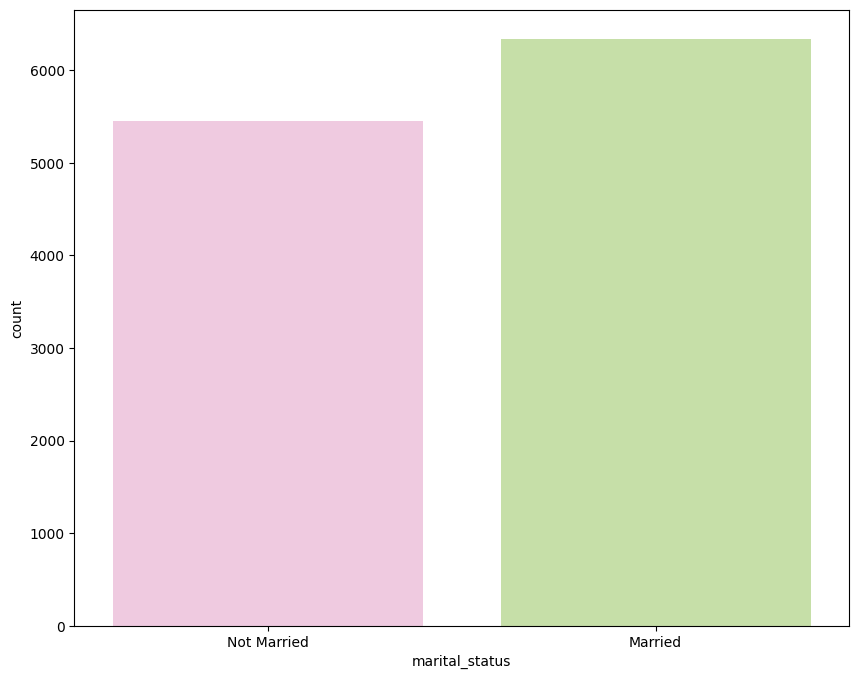

In [109]:
plt.figure(figsize=(10,8))
sns.countplot(x="marital_status",data=df,palette="PiYG")
plt.show()

In [110]:
df["housing_status"].value_counts()

housing_status
Own     8930
Rent    2864
Name: count, dtype: int64

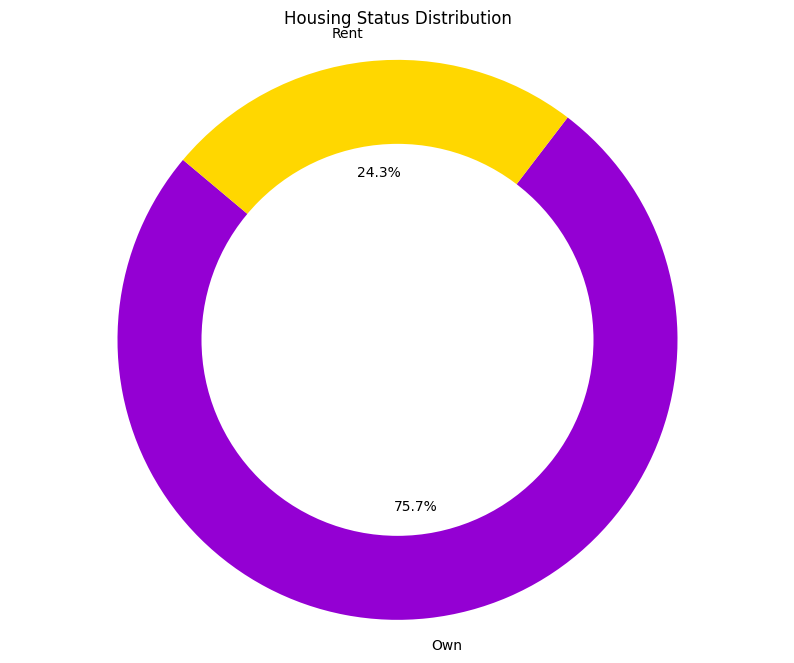

In [111]:

housing_status_counts = df["housing_status"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(housing_status_counts, labels=housing_status_counts.index, autopct='%1.1f%%', startangle=140, colors=['darkviolet', 'gold'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Housing Status Distribution')
plt.axis('equal')
plt.show()

In [112]:
df["employment"].value_counts()

employment
Employed              6602
Not in Labor Force    4500
Unemployed             692
Name: count, dtype: int64

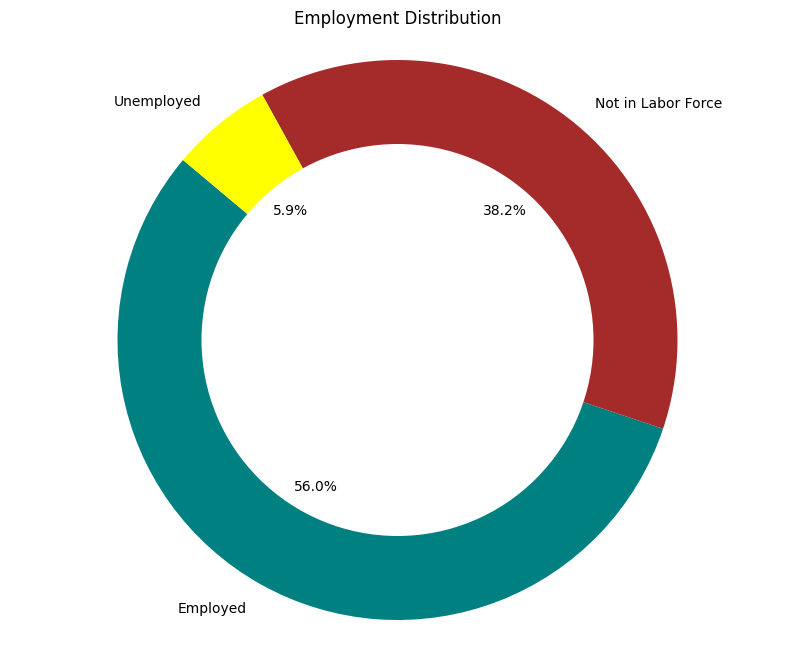

In [113]:
employment_counts = df["employment"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140, colors=["teal", 'brown', 'yellow'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Employment Distribution')
plt.axis('equal')
plt.show()

In [114]:
df["census_msa"].value_counts()

census_msa
MSA, Not Principle  City    5116
MSA, Principle City         3451
Non-MSA                     3227
Name: count, dtype: int64

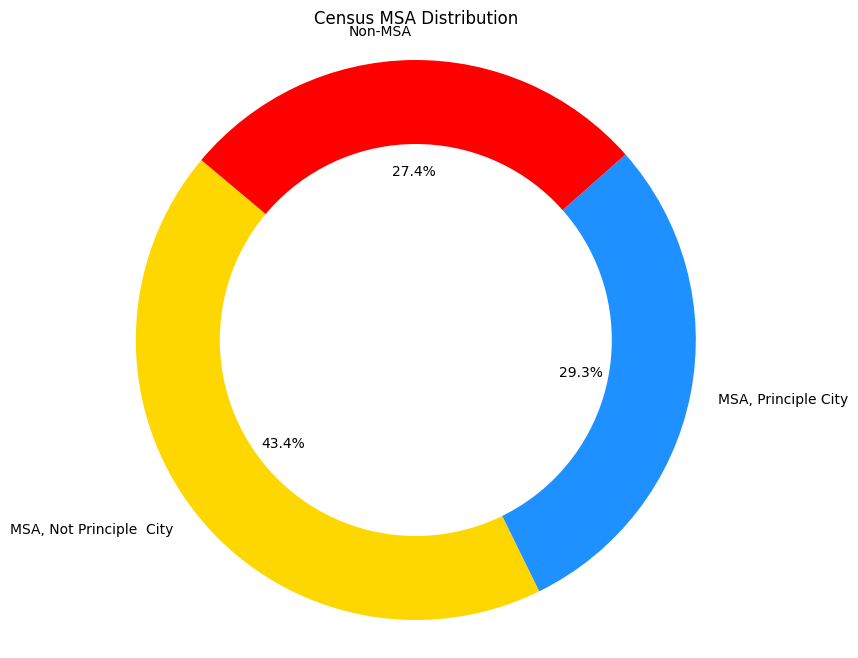

In [115]:


census_msa_counts = df["census_msa"].value_counts()

plt.figure(figsize=(10,8))
plt.pie(census_msa_counts, labels=census_msa_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'dodgerblue', 'red'])

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Census MSA Distribution')
plt.axis('equal')
plt.show()


In [116]:
df["no_of_adults"].value_counts()

no_of_adults
1.0    6435
0.0    3491
2.0    1298
3.0     570
Name: count, dtype: int64

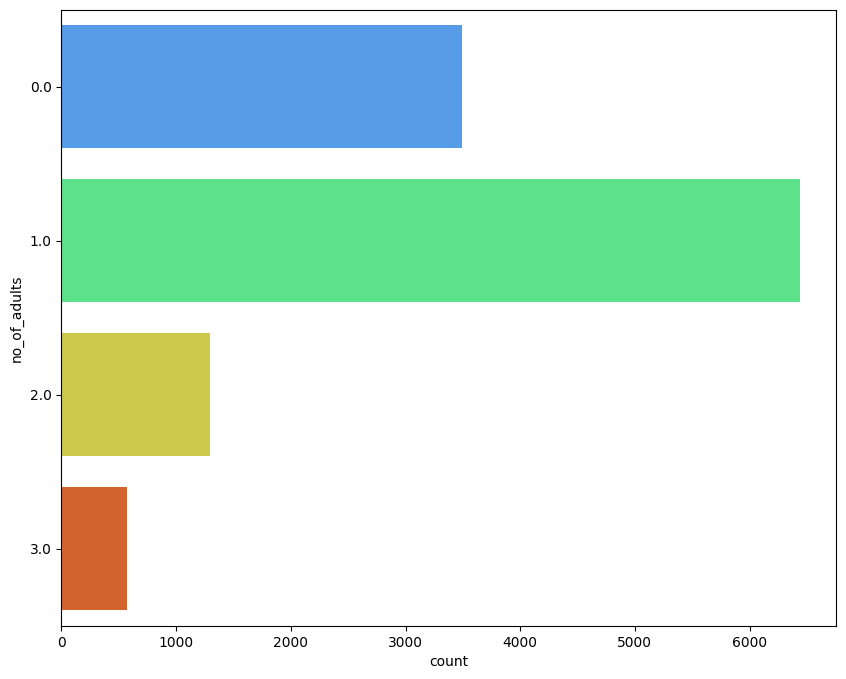

In [117]:
plt.figure(figsize=(10,8))
sns.countplot(y="no_of_adults",data=df,palette="turbo")
plt.show()

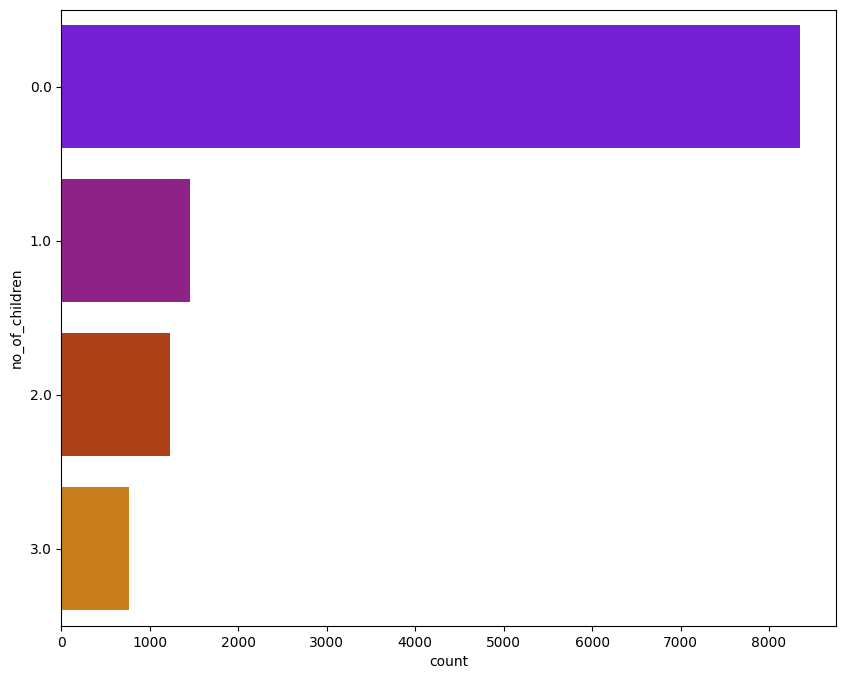

In [118]:
plt.figure(figsize=(10,8))
sns.countplot(y="no_of_children",data=df,palette="gnuplot")
plt.show()

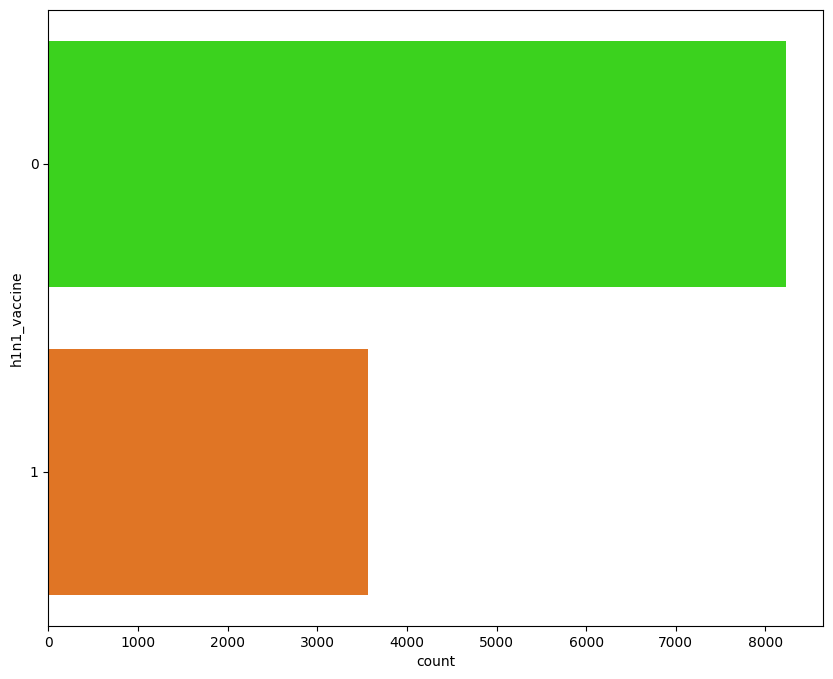

In [119]:
plt.figure(figsize=(10,8))
sns.countplot(y="h1n1_vaccine",data=df,palette="gist_ncar")
plt.show()

In [120]:
df["qualification"]=df["qualification"].replace({"College Graduate":0,"Some College":1,"12 Years":2,"< 12 Years":3})
df["race"]=df["race"].replace({"White":0,"Black":1,"Hispanic":2,"Other or Multiple":3})
df["age_bracket"]=df["age_bracket"].astype(int)
df["sex"]=df["sex"].replace({"Male":0,"Female":1})
df["income_level"]=df["income_level"].replace({"<= $75,000, Above Poverty":0,"> $75,000":2,"Below Poverty":3})
df["marital_status"]=df["marital_status"].replace({"Married":0,"Not Married":1})
df["housing_status"]=df["housing_status"].replace({"Own":0,"Rent":1})
df["employment"]=df["employment"].replace({"Employed":0,"Not in Labor Force":1,"Unemployed":2})
df["census_msa"]=df["census_msa"].replace({"MSA, Not Principle  City":0,"MSA, Principle City":1,"Non-MSA":2})

/tmp/ipykernel_33/636332365.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["qualification"]=df["qualification"].replace({"College Graduate":0,"Some College":1,"12 Years":2,"< 12 Years":3})
/tmp/ipykernel_33/636332365.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["race"]=df["race"].replace({"White":0,"Black":1,"Hispanic":2,"Other or Multiple":3})
/tmp/ipykernel_33/636332365.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, expli

In [121]:
X = df.drop(columns="h1n1_vaccine", axis=1)
Y = df["h1n1_vaccine"]


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# LogisticRegression

In [123]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train,y_train)
pred=lr.predict(X_test)


In [124]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc=accuracy_score(y_test,pred)
print("Accuracy Score : {}".format(acc))

Accuracy Score : 0.8109368376430691


In [125]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1652
           1       0.73      0.59      0.65       707

    accuracy                           0.81      2359
   macro avg       0.78      0.75      0.76      2359
weighted avg       0.80      0.81      0.80      2359



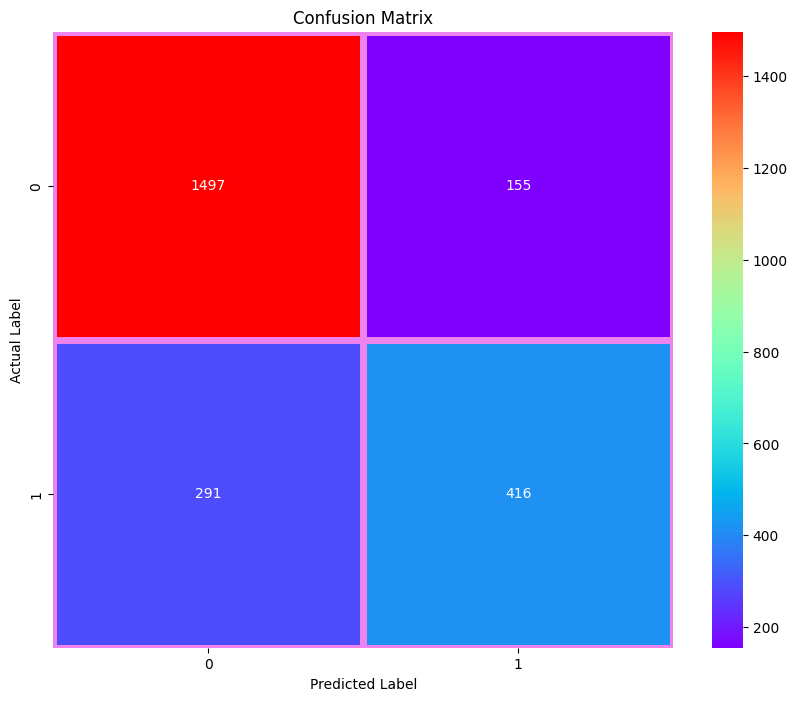

In [126]:
cf=confusion_matrix(y_test,pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, fmt="d", cmap="rainbow", lw=5, linecolor="violet")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

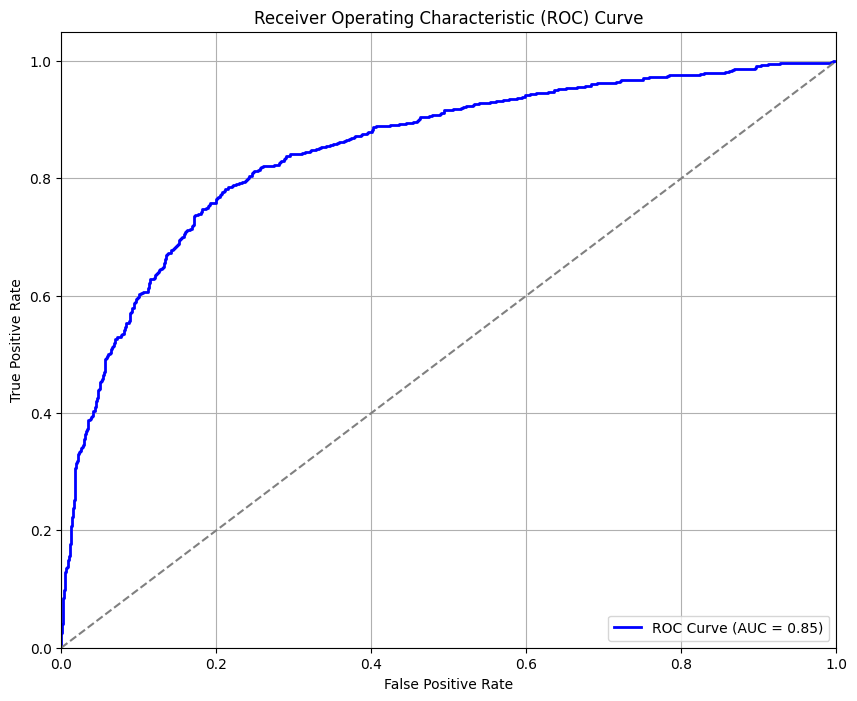

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


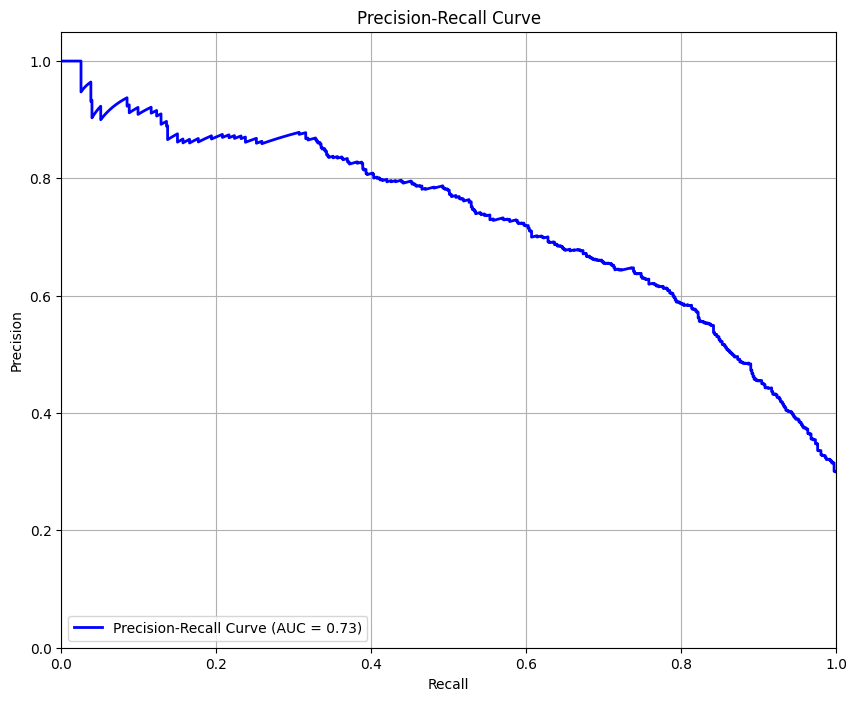

In [128]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
plt.figure(figsize=(10,8))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

#  SGDClassifier

In [131]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train,y_train)
predict=sgd.predict(X_test)

In [132]:
acc0=accuracy_score(y_test,predict)
print("Accuracy Score : {}".format(acc0))

Accuracy Score : 0.7168291649003815


In [134]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1652
           1       0.52      0.76      0.62       707

    accuracy                           0.72      2359
   macro avg       0.70      0.73      0.70      2359
weighted avg       0.77      0.72      0.73      2359



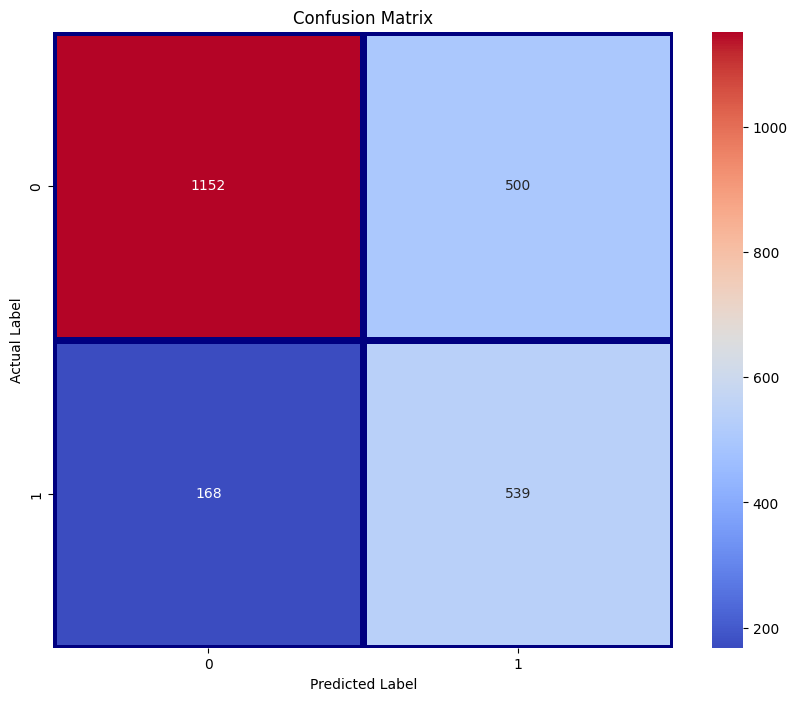

In [133]:
cf=confusion_matrix(y_test,predict)

plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, fmt="d", cmap="coolwarm", lw=5, linecolor="navy")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

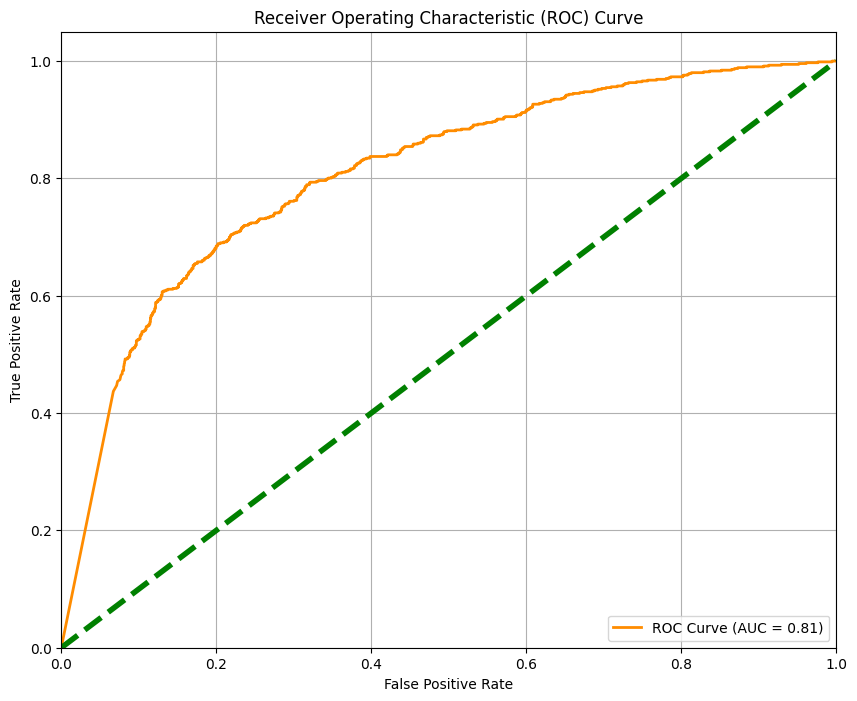

In [136]:
y_probs = sgd.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

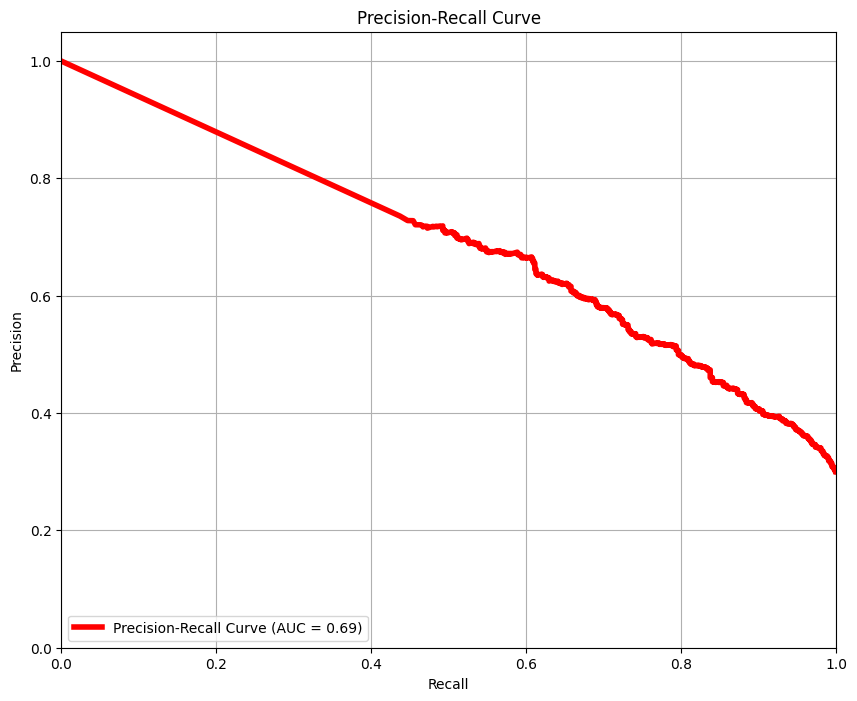

In [137]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
plt.figure(figsize=(10,8))
plt.plot(recall, precision, color="red", lw=4, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()